# Project Title - Airline Passenger Satisfaction

Analyzing Airline Passengers' Satisfaction datasets using tools such as pandas for analysis, matplotlib and seaborn for visualization. Also, we use the opendataset library to download the dataset from an online repository (kaggle.com)

#### Importing necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.filterwarnings("ignore")

### Downloading the Dataset

In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [12]:
dataset_url = 'https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction' 

In [13]:
import opendatasets as od
od.download(dataset_url)

100%|██████████████████████████████████████████████████████████████████████████████| 2.03M/2.03M [00:05<00:00, 414kB/s]


The dataset has been downloaded and extracted.

In [14]:

data_dir = './airline-passenger-satisfaction'

In [15]:
import os
os.listdir(data_dir)

['airline_passenger_satisfaction.csv', 'data_dictionary.csv']

## Data Preparation and Cleaning





In [16]:
flight_df= pd.read_csv('airline-passenger-satisfaction/airline_passenger_satisfaction.csv')
flight_df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [17]:
flight_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [18]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [19]:
flight_raw = 'airline-passenger-satisfaction/data_dictionary.csv'
flight_dict = pd.read_csv(flight_raw, index_col='Field')#.Description
flight_dict

,Description
Field,
ID,Unique passenger identifier
Gender,Gender of the passenger (Female/Male)
Age,Age of the passenger
Customer Type,Type of airline customer (First-time/Returning)
Type of Travel,Purpose of the flight (Business/Personal)
Class,Travel class in the airplane for the passenger...
Flight Distance,Flight distance in miles
Departure Delay,Flight departure delay in minutes
Arrival Delay,Flight arrival delay in minutes


###### CUSTOMER TYPE SATISFACTION

In [20]:
#How many customer were first time and returning
cust_type= flight_df['Customer Type'].value_counts()
cust_type

Returning     106100
First-time     23780
Name: Customer Type, dtype: int64

In [21]:
#Satisfied customer by customer type
graph = flight_df[flight_df['Satisfaction']=='Satisfied']['Customer Type'].value_counts()
graph

Returning     50728
First-time     5700
Name: Customer Type, dtype: int64

In [22]:
#% satisfied by customer type; out of those satisfied, how many of them are either returning or first time
satisfied = flight_df[flight_df['Satisfaction']=='Satisfied']
graph1 = satisfied[['Satisfaction','Customer Type']]
graph1= round(100*graph1.groupby('Customer Type').count()/graph1.shape[0])#.reset_index()
graph1

,Satisfaction
Customer Type,
First-time,10.0
Returning,90.0


In [23]:
#Satisfied customer by customer type
graph2 = flight_df[flight_df['Satisfaction']=='Neutral or Dissatisfied']['Customer Type'].value_counts()
graph2

Returning     55372
First-time    18080
Name: Customer Type, dtype: int64

In [24]:
#% dissatisfied by customer type; out of those not satisfied, how many of them are either returning or first time
dissatisfied = flight_df[flight_df['Satisfaction']=='Neutral or Dissatisfied']
graph3 = dissatisfied[['Satisfaction','Customer Type']]
graph3= round(100*graph3.groupby('Customer Type').count()/graph3.shape[0])#.reset_index()
graph3

,Satisfaction
Customer Type,
First-time,25.0
Returning,75.0


###### FLIGHT BY TRAVEL TYPE

In [25]:
#How many customer type of travel was either business or personal
purpose_type= flight_df['Type of Travel'].value_counts()
purpose_type

Business    89693
Personal    40187
Name: Type of Travel, dtype: int64

###### FLIGHT BY CLASS

In [26]:
#Disaggregate flights by class
class_type= flight_df['Class'].value_counts()
class_type

Business        62160
Economy         58309
Economy Plus     9411
Name: Class, dtype: int64

#### DELAY AT DEPARTURE AND ARRIVAL

In [27]:
#How many customers were delayed at departure for more than 30 minutes
Dept_delay = flight_df[flight_df['Departure Delay']>30]
#Dept_delay>30
total_deptdelay= Dept_delay['Departure Delay'].count()
total_deptdelay

18098

In [28]:
#Departure delay (>30mins) by class
bus_deptdelay = Dept_delay['Class'].value_counts()
bus_deptdelay

Economy         8356
Business        8330
Economy Plus    1412
Name: Class, dtype: int64

In [29]:
#How many customers were delayed at departure for less than 30 minutes
Deptt_delay = flight_df[flight_df['Departure Delay']<30]
#Dept_delay
total_depttdelay= Deptt_delay['Departure Delay'].count()
total_depttdelay

111237

In [30]:
#How many customers were not delayed at departure at all
Dept_nodelay = flight_df[flight_df['Departure Delay']==0]
#Dept_delay
nodelay_dept= Dept_nodelay['Departure Delay'].count()
nodelay_dept

73356

In [31]:
#How many customers were delayed at arrival for more than 30 minutes
arr_delay = flight_df[flight_df['Arrival Delay']>30]
#Dept_delay
total_arrdelay= arr_delay['Arrival Delay'].count()
total_arrdelay

18375

In [32]:
#Arrival delay (>30mins) by class
bus_arrdelay = arr_delay['Class'].value_counts()
bus_arrdelay

Economy         8516
Business        8417
Economy Plus    1442
Name: Class, dtype: int64

In [33]:
#How many customers were delayed at arrival for less than 30 minutes
arri_delay = flight_df[flight_df['Arrival Delay']<30]
#Dept_delay
total_arridelay= arri_delay['Arrival Delay'].count()
total_arridelay

110574

In [34]:
#How many customers were not delayed at arrival at all
arriv_nodelay = flight_df[flight_df['Arrival Delay']==0]
#Dept_delay
nodelay_arr= arriv_nodelay['Arrival Delay'].count()
nodelay_arr

72753

In [35]:
Delay = flight_df[['Departure Delay','Class']]
Delay

,Departure Delay,Class
0,2,Business
1,26,Business
2,0,Business
3,0,Business
4,0,Business
...,...,...
129875,2,Economy Plus
129876,0,Economy Plus
129877,6,Economy Plus
129878,31,Economy Plus


#### SATISFACTION BY CLASS

In [36]:
#Disaggregate overall satisfaction level by class
overall_sat= flight_df[['Satisfaction','Class']]#.value_counts()
overall_sat

,Satisfaction,Class
0,Neutral or Dissatisfied,Business
1,Satisfied,Business
2,Satisfied,Business
3,Satisfied,Business
4,Satisfied,Business
...,...,...
129875,Neutral or Dissatisfied,Economy Plus
129876,Neutral or Dissatisfied,Economy Plus
129877,Neutral or Dissatisfied,Economy Plus
129878,Satisfied,Economy Plus


In [37]:
satisfaction= flight_df['Satisfaction'].value_counts()
satisfaction

Neutral or Dissatisfied    73452
Satisfied                  56428
Name: Satisfaction, dtype: int64

In [38]:
#satisfaction by class
sat_class= overall_sat[overall_sat['Satisfaction']=='Satisfied']['Class'].value_counts()
sat_class

Business        43166
Economy         10943
Economy Plus     2319
Name: Class, dtype: int64

In [39]:
dissat_class= overall_sat[overall_sat['Satisfaction']=='Neutral or Dissatisfied']['Class'].value_counts()
dissat_class

Economy         47366
Business        18994
Economy Plus     7092
Name: Class, dtype: int64

### SATISFACTION LEVEL BASED ON FLIGHT SERVICES

In [40]:
#Disaggregate by customer satisfaction level at the on-board service (from 1 (lowest) to 5 (highest) - 0 means ""not applicable""")
sat_onboarding= flight_df['On-board Service'].value_counts()
sat_onboarding

4    38703
5    29492
3    28542
2    18351
1    14787
0        5
Name: On-board Service, dtype: int64

In [41]:
#Disaggregate by customer satisfaction level at the seat comfort (from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""
sat_seat= flight_df['Seat Comfort'].value_counts()
sat_seat

4    39756
5    33158
3    23328
2    18529
1    15108
0        1
Name: Seat Comfort, dtype: int64

In [42]:
#Disaggregate by customer satisfaction level at the Leg room service (from 1 (lowest) to 5 (highest) - 0 means ""not applicable""")
sat_legroom= flight_df['Leg Room Service'].value_counts()
sat_legroom

4    35886
5    30905
3    25056
2    24540
1    12895
0      598
Name: Leg Room Service, dtype: int64

In [43]:
#Disaggregate by customer satisfaction level at the Cleanliness (from 1 (lowest) to 5 (highest) - 0 means ""not applicable""")
sat_clean= flight_df['Cleanliness'].value_counts()
sat_clean

4    33969
3    30639
5    28416
2    20113
1    16729
0       14
Name: Cleanliness, dtype: int64

In [44]:
#Disaggregate by customer satisfaction level at the food and drink (from 1 (lowest) to 5 (highest) - 0 means ""not applicable""")
sat_food= flight_df['Food and Drink'].value_counts()
sat_food

4    30563
5    27957
3    27794
2    27383
1    16051
0      132
Name: Food and Drink, dtype: int64

In [45]:
#Disaggregate by customer satisfaction level at the in-flight service (from 1 (lowest) to 5 (highest) - 0 means ""not applicable""")
sat_inflight= flight_df['In-flight Service'].value_counts()
sat_inflight

4    47323
5    34066
3    25316
2    14308
1     8862
0        5
Name: In-flight Service, dtype: int64

In [46]:
#Disaggregate by customer satisfaction level at the in-flight wifi service (from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""
sat_wifi= flight_df['In-flight Wifi Service'].value_counts()
sat_wifi

2    32320
3    32185
4    24775
1    22328
5    14356
0     3916
Name: In-flight Wifi Service, dtype: int64

In [47]:
#Disaggregate by customer satisfaction level at the in-flight entertainment (from 1 (lowest) to 5 (highest) - 0 means ""not applicable""")
sat_entertain= flight_df['In-flight Entertainment'].value_counts()
sat_entertain

4    36791
5    31544
3    23884
2    21968
1    15675
0       18
Name: In-flight Entertainment, dtype: int64

In [48]:
#Disaggregate by customer satisfaction level at the Baggage handling (from 1 (lowest) to 5 (highest) - 0 means ""not applicable""")
sat_baggage= flight_df['Baggage Handling'].value_counts()
sat_baggage

4    46761
5    33878
3    25851
2    14362
1     9028
Name: Baggage Handling, dtype: int64

In [49]:
#Disaggregate by customer satisfaction level at the departure and arrival time (from 1 (lowest) to 5 (highest) - 0 means ""not applicable)
sat_deptarr= flight_df['Departure and Arrival Time Convenience'].value_counts()
sat_deptarr

4    31880
5    27998
3    22378
2    21534
1    19409
0     6681
Name: Departure and Arrival Time Convenience, dtype: int64

In [50]:
#Disaggregate by customer satisfaction level at the online booking (from 1 (lowest) to 5 (highest) - 0 means ""not applicable)
sat_booking= flight_df['Ease of Online Booking'].value_counts()
sat_booking

3    30393
2    30051
4    24444
1    21886
5    17424
0     5682
Name: Ease of Online Booking, dtype: int64

In [51]:
#Disaggregate by customer satisfaction level at the check-in service (from 1 (lowest) to 5 (highest) - 0 means ""not applicable)
sat_checkin= flight_df['Check-in Service'].value_counts()
sat_checkin

4    36333
3    35453
5    25883
1    16108
2    16102
0        1
Name: Check-in Service, dtype: int64

In [52]:
#Disaggregate by customer satisfaction level at the online boarding (from 1 (lowest) to 5 (highest) - 0 means ""not applicable""")
sat_boarding= flight_df['Online Boarding'].value_counts()
sat_boarding

4    38468
3    27117
5    26020
2    21934
1    13261
0     3080
Name: Online Boarding, dtype: int64

In [53]:
#Disaggregate by customer satisfaction level at the Gate location (from 1 (lowest) to 5 (highest) - 0 means ""not applicable""")
sat_gate= flight_df['Gate Location'].value_counts()
sat_gate

3    35717
4    30466
2    24296
1    21991
5    17409
0        1
Name: Gate Location, dtype: int64

# Exploratory Analysis and Visualization

We will be exploring some relationships in the flight dataset as well as visualizing some by disaggregation.



##### FLIGHT INFO DISAGGREGATED BY CLASS, CUSTOMER TYPE, PURPOSE OF TRAVEL

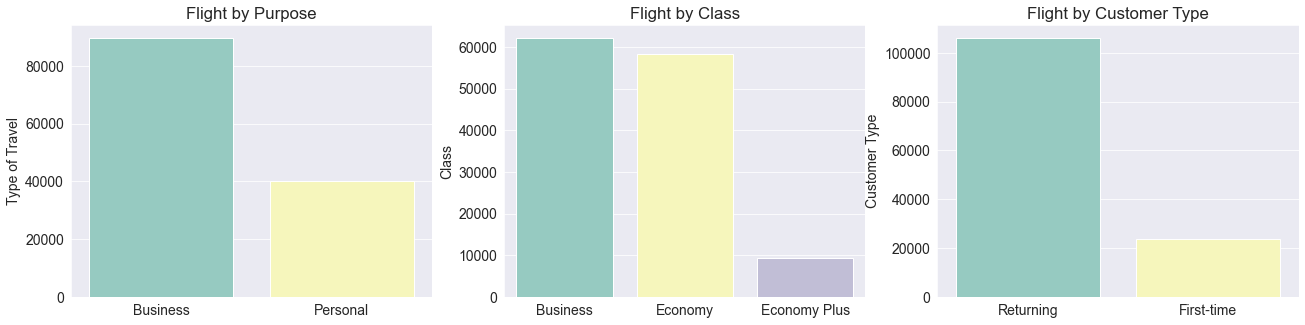

In [55]:
fig, axes = plt.subplots(1,3, figsize=(22, 5))
sns.set_palette(sns.color_palette('Set3'))

axes[0].set_title("Flight by Purpose")#, size=14, x = 0.52, y =0.95)
sns.barplot(purpose_type.index,purpose_type, ax=axes[0]);

axes[1].set_title("Flight by Class")#, size=12, x = 0.52, y =0.95)
sns.barplot(class_type.index,class_type, ax=axes[1]);

axes[2].set_title("Flight by Customer Type")#, size=14)#, x = 0.52, y =0.95)
sns.barplot(cust_type.index, cust_type, ax=axes[2]);



##### EXPLORING SATISFACTION BY CUSTOMER TYPE AND CLASS

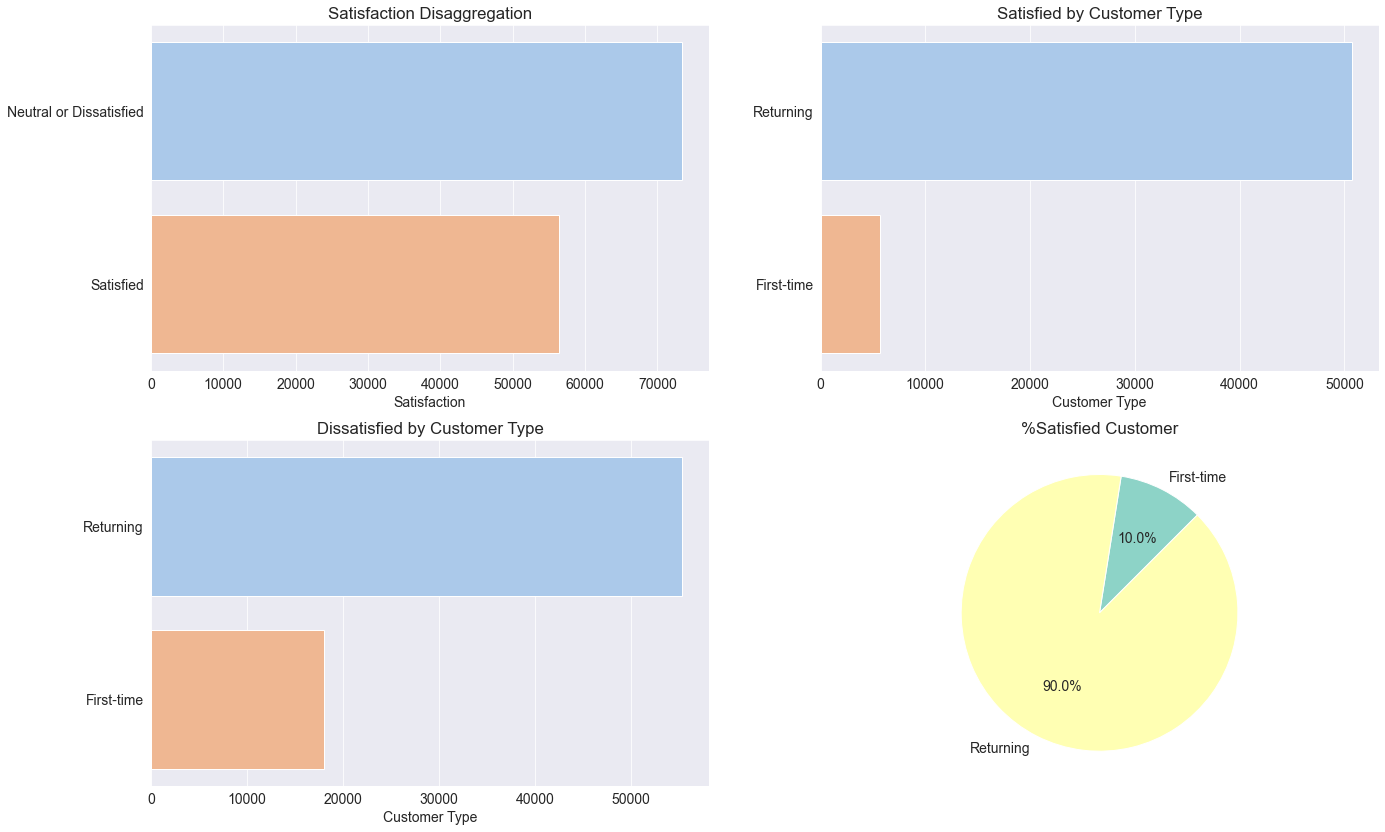

In [56]:
fig, axes = plt.subplots(2,2, figsize=(22, 14))
sns.set_palette(sns.color_palette('pastel'))

axes[0,0].set_title("Satisfaction Disaggregation")#, size=14, x = 0.52, y =0.95)
sns.barplot(satisfaction, satisfaction.index, ax=axes[0,0]);

axes[0,1].set_title("Satisfied by Customer Type")#, size=14, x = 0.52, y =0.95)
sns.barplot(graph, graph.index, ax=axes[0,1]);

axes[1,0].set_title("Dissatisfied by Customer Type")#, size=14, x = 0.52, y =0.95)
sns.barplot(graph2, graph2.index, ax=axes[1,0]);

axes[1,1].set_title("%Satisfied Customer")#, size=14, x = 0.52, y =0.95)
axes[1,1].pie(graph1.Satisfaction, labels = graph1.index, autopct = '%1.1f%%', startangle = 45);

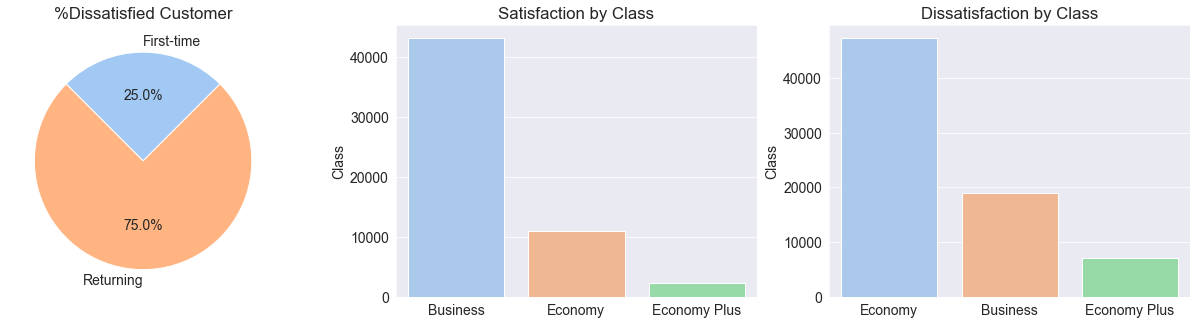

In [57]:
fig, axes = plt.subplots(1,3, figsize=(22, 5))
sns.set_palette(sns.color_palette('pastel'))

axes[0].set_title("%Dissatisfied Customer")#, size=14, x = 0.52, y =0.95)
axes[0].pie(graph3.Satisfaction, labels = graph3.index, autopct = '%1.1f%%', startangle = 45);

axes[1].set_title("Satisfaction by Class")#, size=14)#, x = 0.52, y =0.95)
sns.barplot(sat_class.index, sat_class, ax=axes[1]);

axes[2].set_title("Dissatisfaction by Class")#, size=14)#, x = 0.52, y =0.95)
sns.barplot(dissat_class.index, dissat_class, ax=axes[2]);

### SATISFACTION LEVEL BASED ON FLIGHT SERVICES

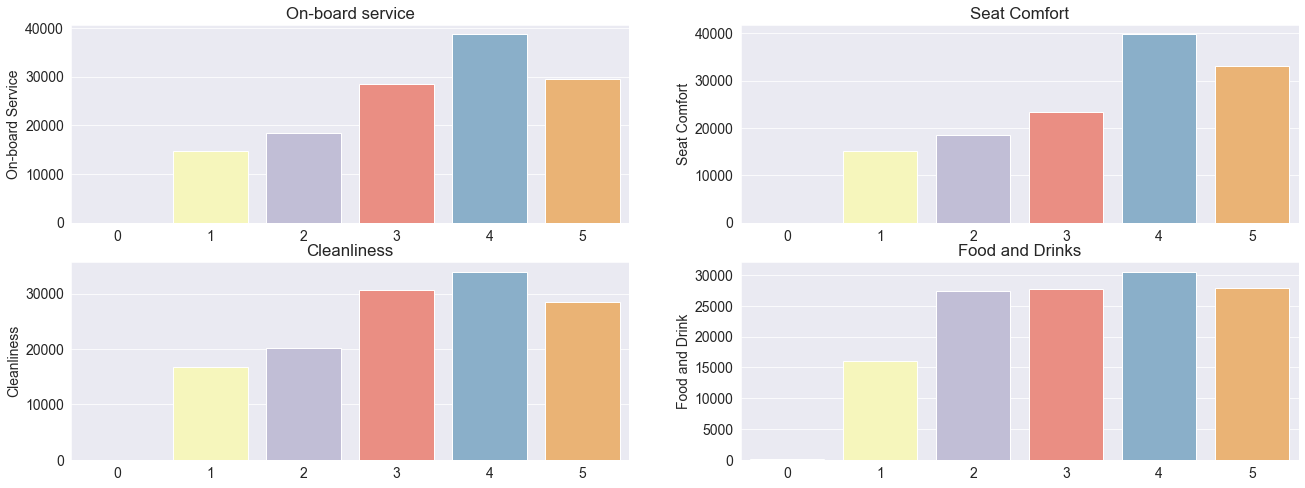

In [58]:
fig, axes = plt.subplots(2,2, figsize=(22, 8))
sns.set_palette(sns.color_palette('Set3'))

axes[0,0].set_title("On-board service")#, size=14, x = 0.52, y =0.95)
sns.barplot(sat_onboarding.index,sat_onboarding, ax=axes[0,0]);

axes[0,1].set_title("Seat Comfort")#, size=12, x = 0.52, y =0.95)
sns.barplot(sat_seat.index,sat_seat, ax=axes[0,1]);

axes[1,0].set_title("Cleanliness")#, size=14)#, x = 0.52, y =0.95)
sns.barplot(sat_clean.index, sat_clean, ax=axes[1,0]);

axes[1,1].set_title("Food and Drinks")#, size=14)#, x = 0.52, y =0.95)
sns.barplot(sat_food.index, sat_food, ax=axes[1,1]);

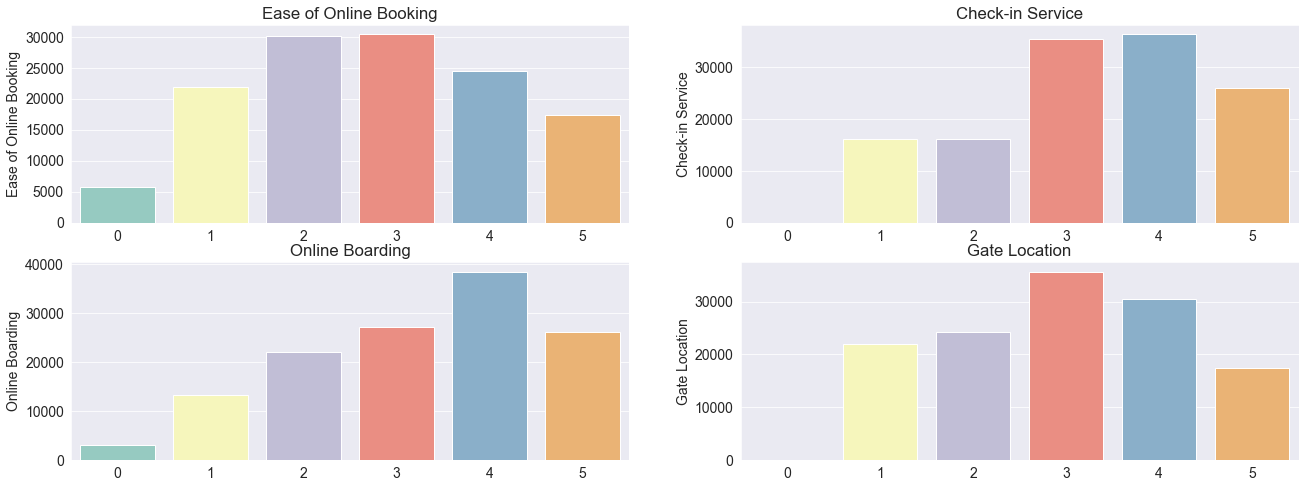

In [59]:
fig, axes = plt.subplots(2,2, figsize=(22, 8))
sns.set_palette(sns.color_palette('Set3'))

axes[0,0].set_title("Ease of Online Booking")#, size=14)#, x = 0.52, y =0.95)
sns.barplot(sat_booking.index, sat_booking, ax=axes[0,0]);

axes[0,1].set_title("Check-in Service")#, size=14)#, x = 0.52, y =0.95)
sns.barplot(sat_checkin.index, sat_checkin, ax=axes[0,1]);

axes[1,0].set_title("Online Boarding")#, size=14)#, x = 0.52, y =0.95)
sns.barplot(sat_boarding.index, sat_boarding, ax=axes[1,0]);

axes[1,1].set_title("Gate Location")#, size=14)#, x = 0.52, y =0.95)
sns.barplot(sat_gate.index, sat_gate, ax=axes[1,1]);

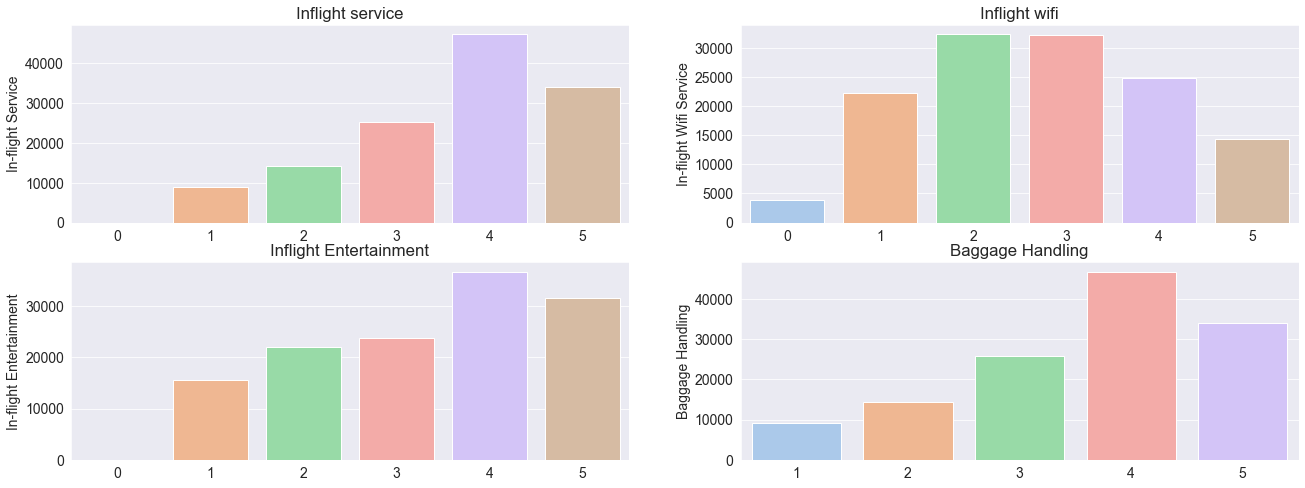

In [60]:
fig, axes = plt.subplots(2,2, figsize=(22, 8))
sns.set_palette(sns.color_palette('pastel'))

axes[0,0].set_title("Inflight service")#, size=14)#, x = 0.52, y =0.95)
sns.barplot(sat_inflight.index, sat_inflight, ax=axes[0,0]);

axes[0,1].set_title("Inflight wifi")#, size=14)#, x = 0.52, y =0.95)
sns.barplot(sat_wifi.index, sat_wifi, ax=axes[0,1]);

axes[1,0].set_title("Inflight Entertainment")#, size=14)#, x = 0.52, y =0.95)
sns.barplot(sat_entertain.index, sat_entertain, ax=axes[1,0]);

axes[1,1].set_title("Baggage Handling")#, size=14)#, x = 0.52, y =0.95)
sns.barplot(sat_baggage.index, sat_baggage, ax=axes[1,1]);



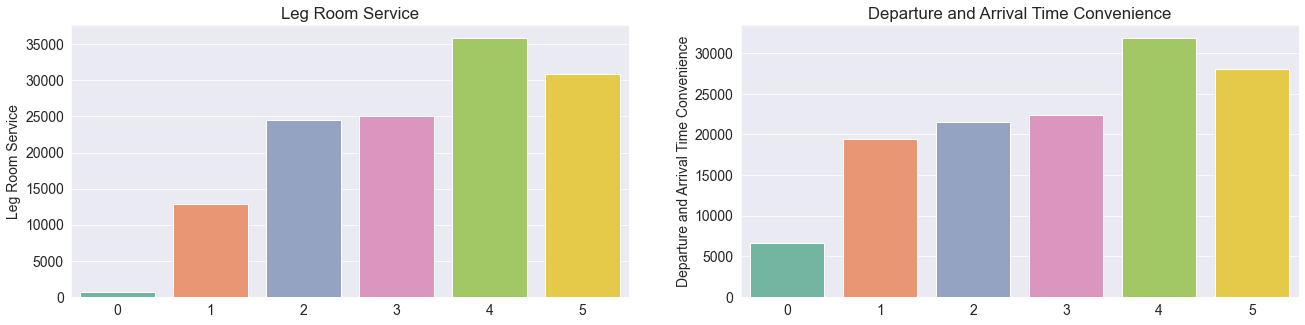

In [61]:
fig, axes = plt.subplots(1,2, figsize=(22, 5))
sns.set_palette(sns.color_palette('Set2'))

axes[0].set_title("Leg Room Service")#, size=14)#, x = 0.52, y =0.95)
sns.barplot(sat_legroom.index, sat_legroom, ax=axes[0]);

axes[1].set_title("Departure and Arrival Time Convenience")#, size=14)#, x = 0.52, y =0.95)
sns.barplot(sat_deptarr.index, sat_deptarr, ax=axes[1]);


#### DELAY AT DEPARTURE AND ARRIVAL

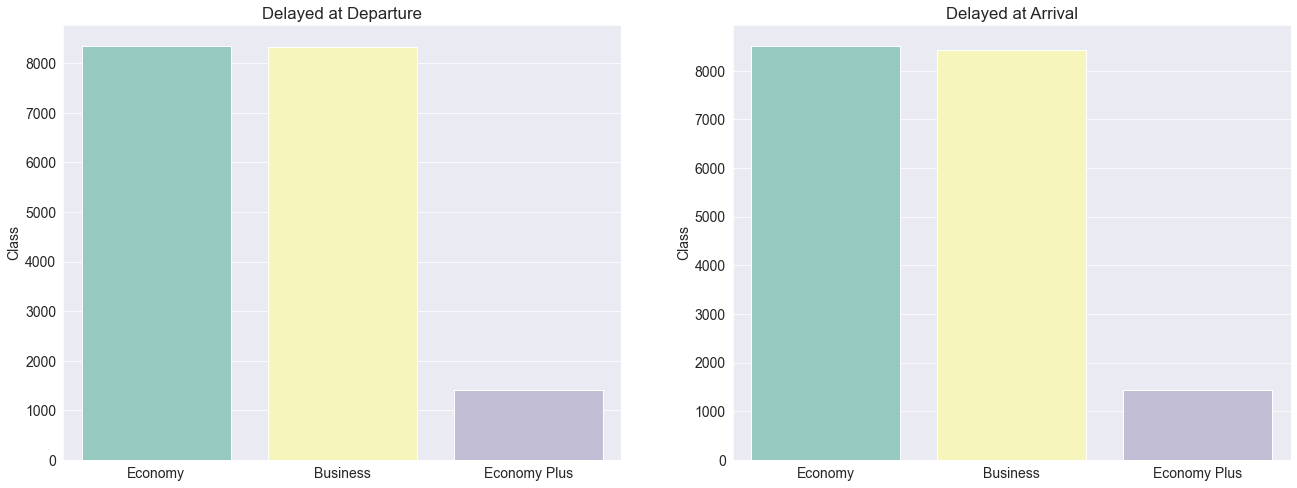

In [62]:
fig, axes = plt.subplots(1,2, figsize=(22, 8))
sns.set_palette(sns.color_palette('Set3'))

axes[0].set_title("Delayed at Departure")#, size=14)#, x = 0.52, y =0.95)
sns.barplot(bus_deptdelay.index, bus_deptdelay, ax=axes[0]);

axes[1].set_title("Delayed at Arrival")#, size=14)#, x = 0.52, y =0.95)
sns.barplot(bus_arrdelay.index, bus_arrdelay, ax=axes[1]);

## Asking and Answering Questions about the dataset


#### Q1: Absolute value of customers delayed at departure

In [63]:
#How many customers were delayed at departure for more than 30 minutes
Dept_delay = flight_df[flight_df['Departure Delay']>30]
#Dept_delay>30
total_deptdelay= Dept_delay['Departure Delay'].count()
total_deptdelay

18098

In [64]:
#How many customers were delayed at departure for less than 30 minutes
Deptt_delay = flight_df[flight_df['Departure Delay']<30]
#Dept_delay
total_depttdelay= Deptt_delay['Departure Delay'].count()
total_depttdelay

111237

In [65]:
#How many customers were not delayed at departure at all
Dept_nodelay = flight_df[flight_df['Departure Delay']==0]
#Dept_delay
nodelay_dept= Dept_nodelay['Departure Delay'].count()
nodelay_dept

73356

#### Q2: Absolute value of customers delayed at arrival

In [66]:
#How many customers were delayed at arrival for more than 30 minutes
arr_delay = flight_df[flight_df['Arrival Delay']>30]
#Dept_delay
total_arrdelay= arr_delay['Arrival Delay'].count()
total_arrdelay

18375

In [67]:
#How many customers were delayed at arrival for less than 30 minutes
arri_delay = flight_df[flight_df['Arrival Delay']<30]
#Dept_delay
total_arridelay= arri_delay['Arrival Delay'].count()
total_arridelay

110574

In [68]:
#How many customers were not delayed at arrival at all
arriv_nodelay = flight_df[flight_df['Arrival Delay']==0]
#Dept_delay
nodelay_arr= arriv_nodelay['Arrival Delay'].count()
nodelay_arr

72753

#### Q3: Satisfaction by gender

In [69]:
#Satisfaction by gender
gender_sat= satisfied['Gender'].value_counts()
gender_sat

Female    28269
Male      28159
Name: Gender, dtype: int64

In [70]:
#Satisfaction by gender
gender_dissat= dissatisfied['Gender'].value_counts()
gender_dissat

Female    37630
Male      35822
Name: Gender, dtype: int64

#### Q4: Satisfaction by age group

In [71]:
def assigning_age_group(df):
    flight_df['Age_group'] =pd.cut(x=flight_df['Age'], bins=[0,10,18,30,45,60,100], labels=["<10yrs","10-18yrs","18-30yrs","30-45yrs","45-60yrs","Older"])
    return df

df = assigning_age_group(flight_df)


In [72]:
sat_age= df[df['Satisfaction']=='Satisfied']['Age_group'].value_counts()
sat_age

45-60yrs    21515
30-45yrs    20246
18-30yrs    10624
Older        2093
10-18yrs     1568
<10yrs        382
Name: Age_group, dtype: int64

In [73]:
sat_age= df[df['Satisfaction']=='Neutral or Dissatisfied']['Age_group'].value_counts()
sat_age

30-45yrs    21236
18-30yrs    19186
45-60yrs    15949
Older        7961
10-18yrs     6339
<10yrs       2781
Name: Age_group, dtype: int64

## Inferences and Conclusion

A summary of all the inferences drawn from the analysis, and conclusions drawn by answering various questions.


 We have more customers on Business purpose (69%) than personal purpose (31%)
 We have more customers flying Business class(48%) and Economy class (45%) while very little in Economy Plus (7%)
 We have more returning customers (82%) than first time customers (18%)

 We have more female customers (51%) than male customers (49%)
 Most have more dissatisfaction with female customers (51%) than male customers
 Out of those satisfied, we have 90% of them from returning customers
 Out of those dissatisfied (57%), we have 75% of them from returning customers

 Customers within the age group 45-60years old (38%) are more satisfied than other age group. 36% for 30-35yrs, 19% for 
 18-  30yrs,4% for ages above 60years and the remaining % shared amongst 10-18yrs and <10yrs

 Customers within the age group 30-45years old (29%) are more satisfied than other age group. 26% for 18-30yrs,
 22%% for 45-60yrs, 10% for ages above 60years and the remaining % shared amongst 10-18yrs and <10yrs


 Customers that flew Business had more satisfaction (76%) than those that flew other class
 For dissatisfaction, those that flew Economy (71%) were most dissatisfied

 For delayed customers at arrival, we have 14% (18375) customers delayed for more than 30 minutes, 
 85% (110574) for less than 30 minutes and 56% (72753) had no delay

 For delayed customers at departure, we have 14% (18098) customers delayed for more than 30 minutes, 
 86% (111237) for less than 30 minutes, and 56% (73356) had no delay

 Satisfaction with flight services;
     Most customers were satisfied(4) with the onboard service, seat comfort, cleanliness,checkin service online boarding,  inflight service food and drinks, baggage handling, inflight entertainment, leg room service and Departure and arrival time convenience.

 Customers were slightly satisfied (3) with the gate location, ease of online booking, inflight wifi